{'Dirichlet': {-2: 0.0, -1: 0.0, 1: 0.9}}
nodes[	ID: 0, Marker: 0	RVector3: (-30.0, 0.01, 0.0)
, 	ID: 1, Marker: 0	RVector3: (-30.0, -2.0, 0.0)
, 	ID: 2, Marker: 0	RVector3: (-30.0, -8.0, 0.0)
, 	ID: 3, Marker: 0	RVector3: (-30.0, -20.0, 0.0)
]
nodes[	ID: 4, Marker: 0	RVector3: (30.0, -20.0, 0.0)
, 	ID: 5, Marker: 0	RVector3: (30.0, -8.0, 0.0)
, 	ID: 6, Marker: 0	RVector3: (30.0, -2.0, 0.0)
, 	ID: 7, Marker: 0	RVector3: (30.0, 0.01, 0.0)
]
nodes[	ID: 8, Marker: 0	RVector3: (-20.35, 0.1, 0.0)
, 	ID: 9, Marker: 0	RVector3: (-20.35, -0.9, 0.0)
, 	ID: 10, Marker: 0	RVector3: (-19.65, -0.9, 0.0)
, 	ID: 11, Marker: 0	RVector3: (-19.65, 0.1, 0.0)
]
nodes[	ID: 12, Marker: 0	RVector3: (-15.35, 0.1, 0.0)
, 	ID: 13, Marker: 0	RVector3: (-15.35, -0.9, 0.0)
, 	ID: 14, Marker: 0	RVector3: (-14.65, -0.9, 0.0)
, 	ID: 15, Marker: 0	RVector3: (-14.65, 0.1, 0.0)
]
nodes[	ID: 16, Marker: 0	RVector3: (-10.35, 0.1, 0.0)
, 	ID: 17, Marker: 0	RVector3: (-10.35, -0.9, 0.0)
, 	ID: 18, Marker: 0	RVector3: (-9.65

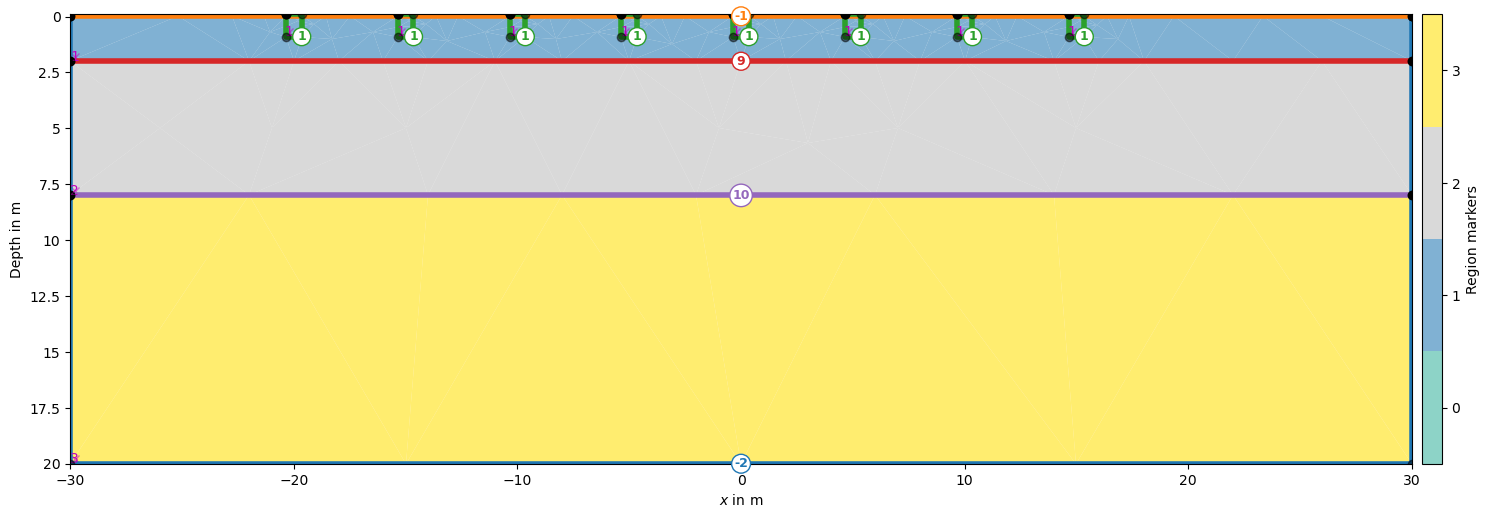

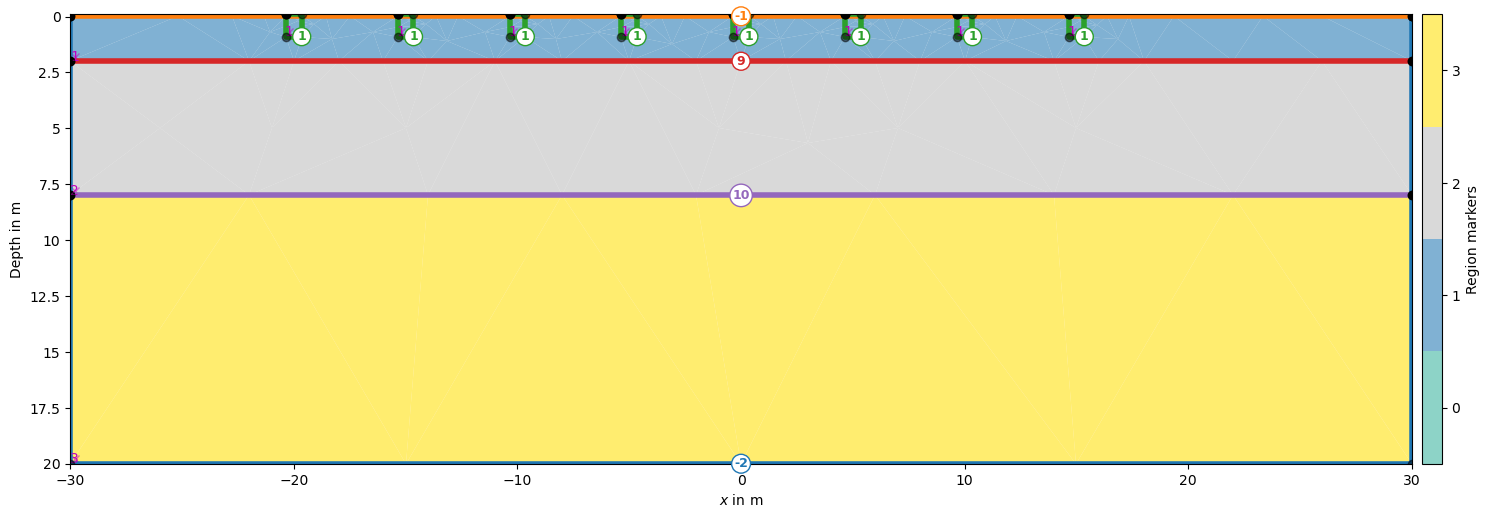

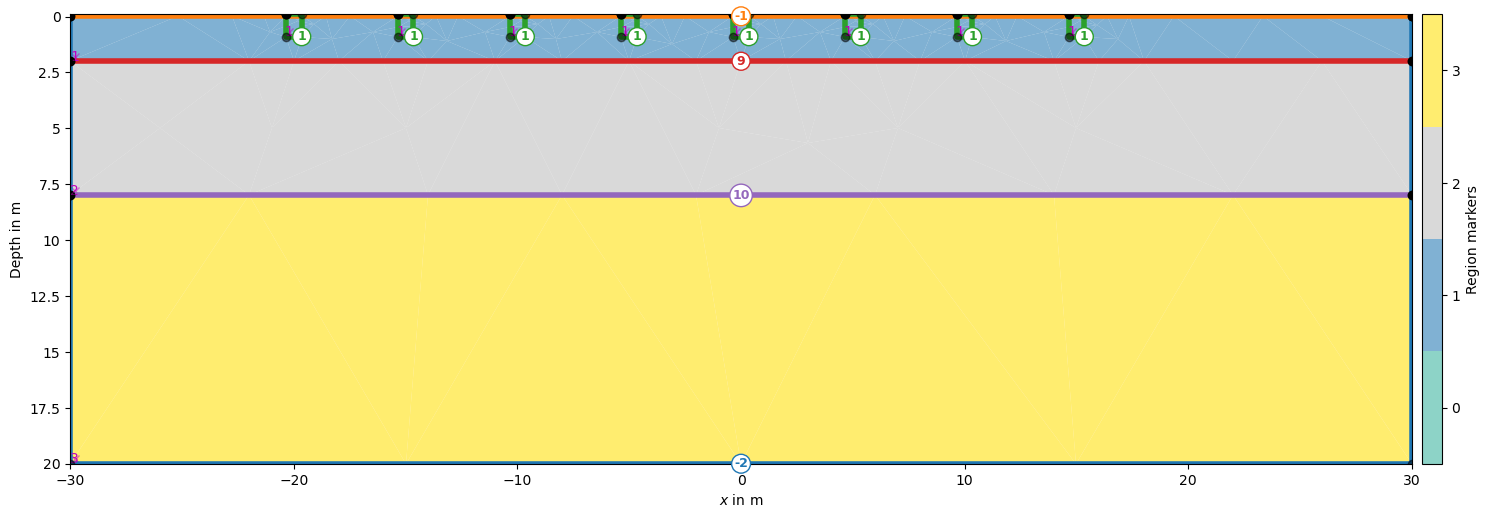

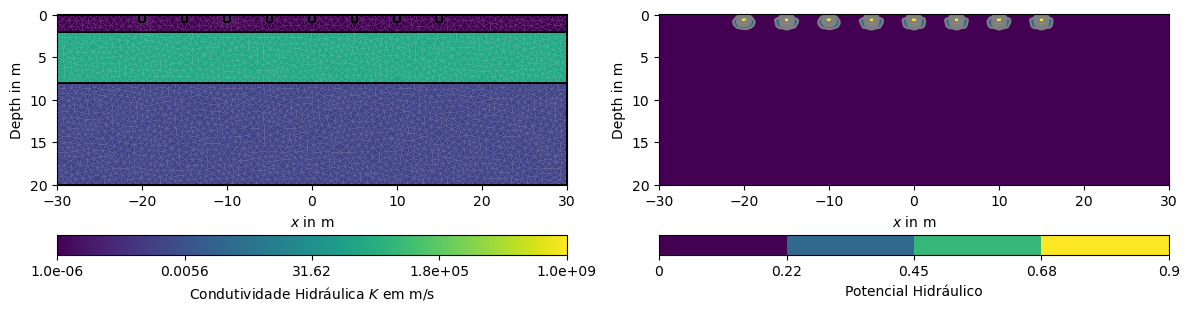

17/01/25 - 12:24:42 - pyGIMLi - WARNING - Courant-Friedrichs-Lewy Number: 4875774850922.776 but should be lower 1 to ensure movement inside a cell per timestep. (vMax = 10000000000.0 dt = 48.02668148971651 dx = 0.09850061366272297 dt < 9.850061366272297e-12  | N >  4875774850923 )
g:\0GG\gnv\00-code\Anaconda\envs\gimli\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:597: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve


Mean: 3.311958811664212, Std: 9.661658247487209, Min: -7.390757042937048e-29, Max: 152.31961855535474
Warning! DataSchemeBase::create has unhandled arguments
{'spacing': 10}


g:\0GG\gnv\00-code\Anaconda\envs\gimli\lib\site-packages\pygimli\viewer\showmesh.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  ax = pg.plt.subplots(figsize=kwargs.pop('figsize', None))[1]


Timestep 1:
Mean: 3300.089791405699, Std: 0.0, Min: 3300.089791405699, Max: 3300.089791405699,

Timestep 2:
Mean: 3297.902417311769, Std: 75.98476084395924, Min: 16.16718067787124, Max: 3300.8857467995826,

Timestep 3:
Mean: 3296.244773020385, Std: 104.66332699457514, Min: 8.459331333904636, Max: 3307.6934672846783,

Timestep 4:
Mean: 3295.2584766377263, Std: 118.82696911404867, Min: 6.67959029707824, Max: 3314.747006444139,

Timestep 5:
Mean: 3294.5489266993713, Std: 128.60176111937716, Min: 5.863916597640928, Max: 3452.548888539483,

Timestep 6:
Mean: 3294.023814045067, Std: 135.25641842228276, Min: 5.388846706756351, Max: 3308.5820118072425,

Timestep 7:
Mean: 3293.604979744148, Std: 140.4091594767957, Min: 5.068182248002772, Max: 3306.8690804859443,

Timestep 8:
Mean: 3293.286030444066, Std: 144.65327091215818, Min: 4.835623766083488, Max: 3305.015083374971,

Timestep 9:
Mean: 3293.0499172208542, Std: 148.00240952503466, Min: 4.604180244457745, Max: 3306.504578516024,

Timestep 10:

KeyboardInterrupt: 

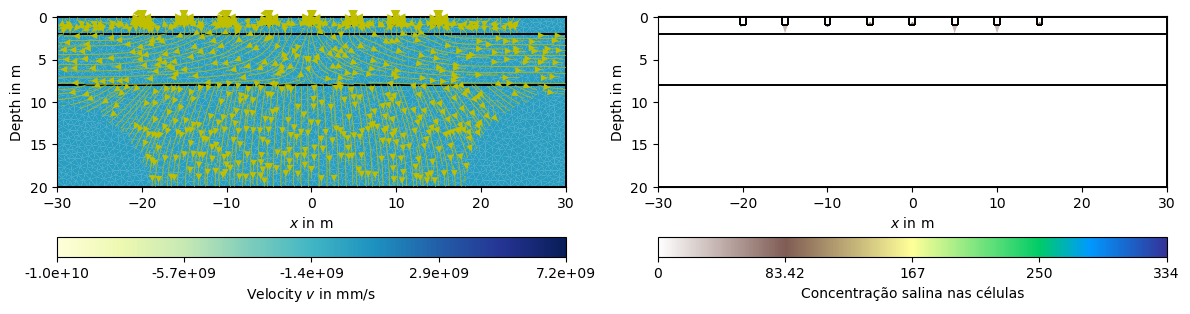

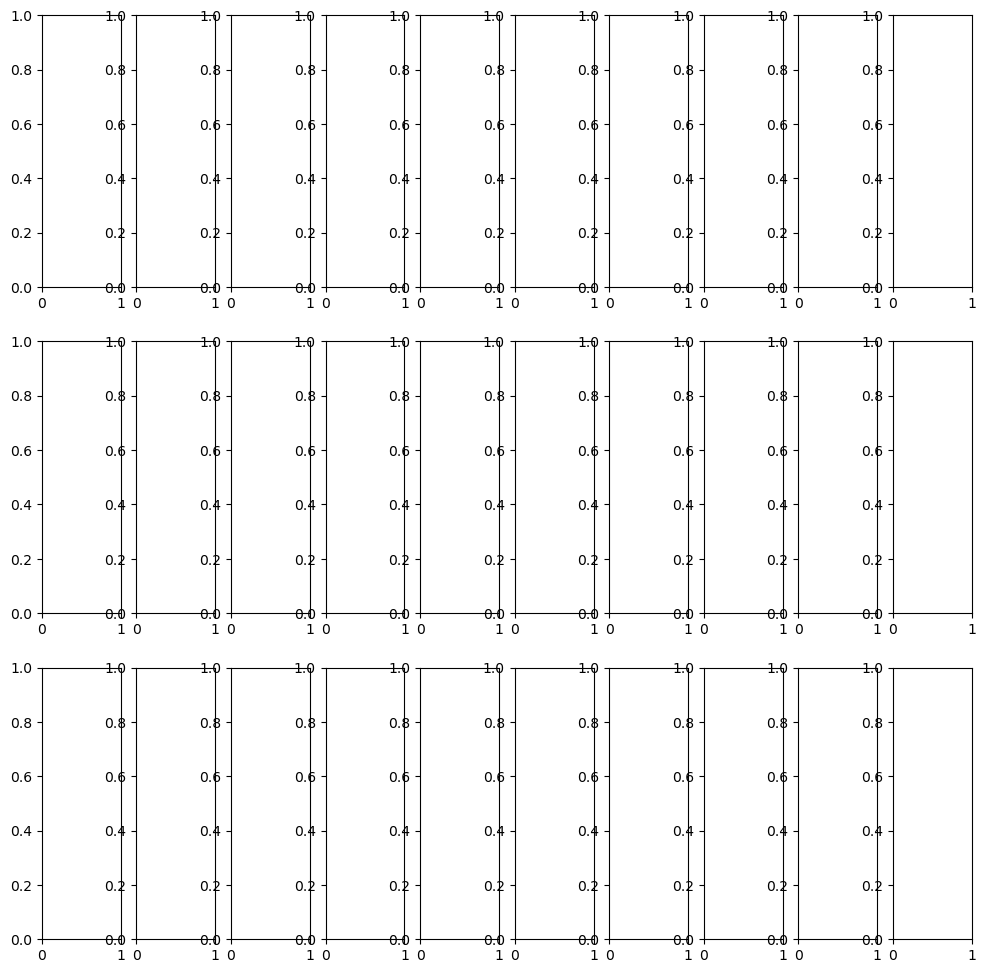

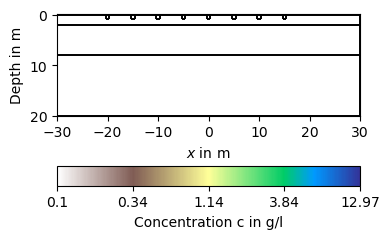

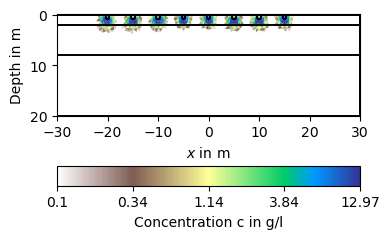

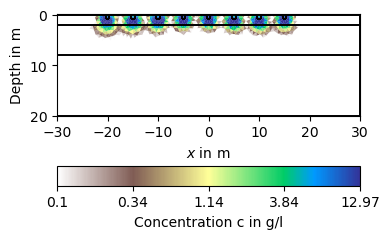

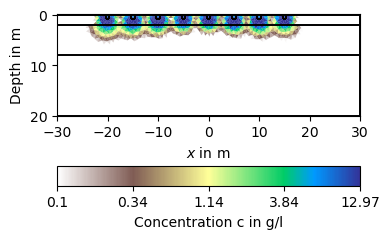

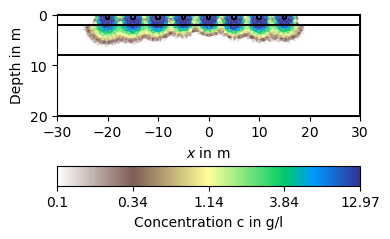

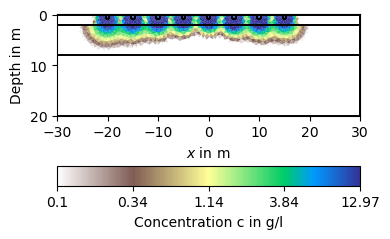

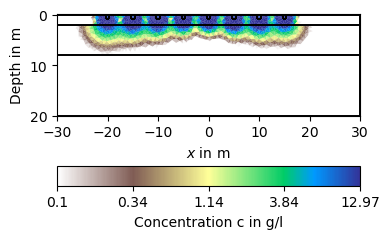

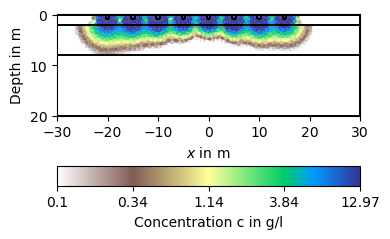

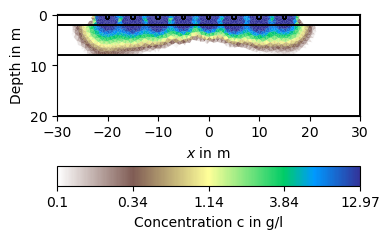

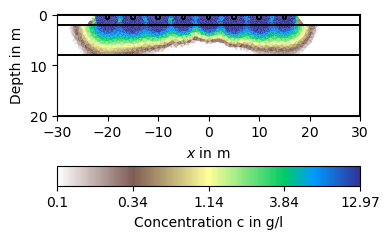

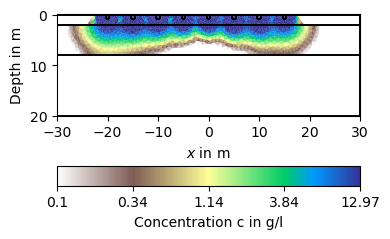

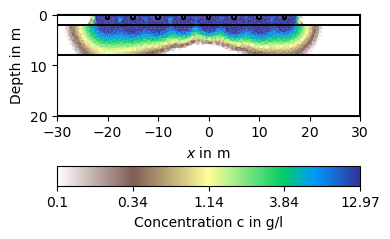

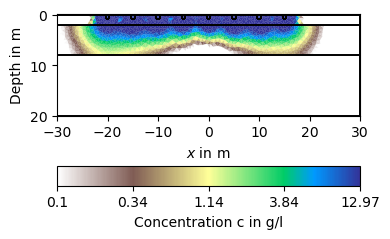

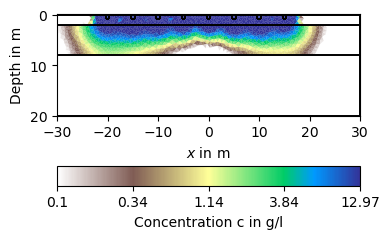

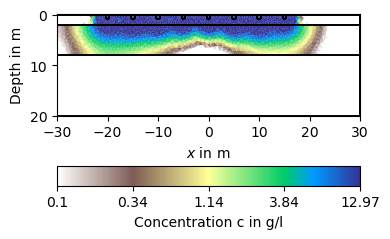

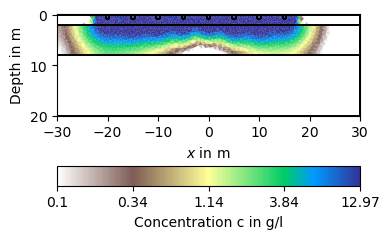

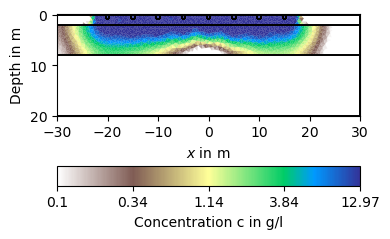

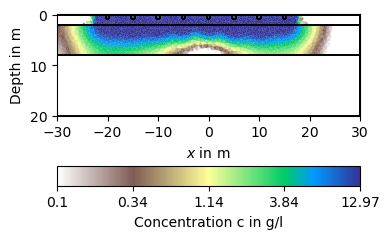

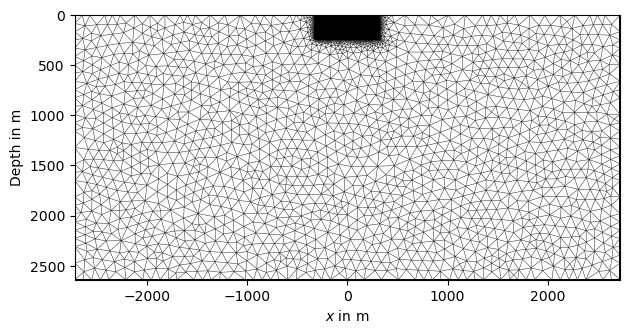

In [1]:
# %% [markdown]
# <a href="https://colab.research.google.com/github/guiguilhermegui/TF/blob/main/modelo_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# %%
# Checkout www.pygimli.org for more examples
#!pip install pygimli tetgen

# %% [markdown]
# 
# # Hydrogeophysical modelling
# 
# Coupled hydrogeophysical modelling example. This essentially represents the
# forward modelling step of the example presented in section 3.2 of the [pyGIMLi
# paper](http://www.sciencedirect.com/science/article/pii/S0098300417300584/pdfft?md5=44253eaacd5490e3fb32210671672496&pid=1-s2.0-S0098300417300584-main.pdf).
# 

# %% [markdown]
# Create geometry definition for the modelling domain
# 
# 

# %%
# imports

import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
import pygimli.meshtools as mt
import pygimli.physics.ert as ert
import pygimli.physics.petro as petro
from pygimli.physics import ERTManager

# %%

### Parametros
## Espaciais
# Espaciais dos furos
bores = [-20, -15, -10, -5, 0, 5, 10, 15]                       # Posição central dos furos
prof_poco=-0.9
altura_poco= 0.1
raio_poco=0.35   #precisa ser decimal Ex:"3.00001"

# Espaciais do Terreno
box_esq=-30
box_dir=30
box_top=0.01
box_bottom=-20

# Espaciais discretização de células
mesh_area=0.4               # area da mesh em metros^2
mesh_quality=30             # qualidade da mesh evitar valores acima de 33 por questões de performance

## Hidráulicos do meio
# Condutividade Hidráulica em m/s 
K_poco = 1e9       #poço
K_mundo1 = 1e-6    #latossolo
K_mundo2 = 1e3     #fratura 
K_mundo3 = 1e-3    #rocha
#Marcador de região do modelo
Mk_poco = 0       #poço
Mk_mundo1 = 1    #latossolo     
Mk_mundo2 = 2    #fratura 
Mk_mundo3 = 3    #rocha

# Resumir Condutividades hidráulicas em uma variável só
kMap = [[Mk_mundo1, K_mundo1],  [Mk_poco, K_poco], [Mk_mundo2,K_mundo2],[Mk_mundo3,K_mundo3] ]   #Use [[RegionMarker, ConductivityValue], ...]

# Propriedades do meio poroso ADV
phi = 0.3                   # Porosidade meio
D = 0.01                    # Coeficiente de dispersão m^2/s


## Traçador                  # Condutividade elétrica da água em S/m
sigma_a = -0.00031            
sigma_bx = 0.19330           # Termos da Eq. de Resistência/concentração = A+bx   
TracerCon = 13.27            # Concentração em g/l
cementation_exponent = 1.1  # Exponente de cimentação para a resistividade do solo
res_water = 10000            # Resistividade da água em Ohm.m


# Resistividade do meio em Ohm.m
Layer0=box_top
RLayer0=300
Layer1=-2                    # Prof. da camada 1
RLayer1=150                  # Resistividade da camada 1
Layer2=-8                    # Prof. da camada 2
RLayer2=4464                 # Resistividade da camada 2
Layer3=-24                   # Prof. da camada 3
RLayer3=3300                 # Resistividade da camada 4

# Configuração ERT 
ERT_dist= 600                # Distância total dos eletrodos em m
ERT_elecs = 60               # Quantidade de eletrodos
ERT_spac = 10                # Espaçamento entre os eletrodos em m
ERT_Array = 'dd'             # wn, ws, wa, wb, dd, pd, pp, grad 

y_limit = 10                 # Set the Y-axis limit to cut off below DD12



# Temporais
TimeSimu_days = 1                     # Tempo de simulação em dias  
TimeSimu_sec = TimeSimu_days*24*60*60   # Tempo de simulação em seg  
TimeSimu_steps = 30*60                  # Quantidade de passos pra simulação
number_of_timesERT = 12        # Número de vezes que a simulação de ERT é executada


""" Cálculos Espaciais relativos do furo """
esq = '.' + f'{raio_poco:.2f}'.split('.')[1]
dir = '.' + f'{1 - raio_poco:.2f}'.split('.')[1]#print(f'raio_poco={raio_poco:.2f} esq={esq} dir={dir}')

""" Cálculo Espaçamento dos eletrodos """
elecs = np.linspace(-ERT_dist/2, ERT_dist/2, ERT_elecs)


""" Cálculo tempo de simulação """
t = pg.utils.grange(0, TimeSimu_sec, n=TimeSimu_steps)

# %%
## EDP - Condições de Contorno - potencial hidráulico 
basemundo_2 = 0.0             # Definir valores de fronteira pro potencial hidráulico  # fronteiras 1top, 2lat,3_fundo,4latmundo,-2basemundo,-1topomundo
topo7 = 0.9
#laterais8 = h202             # Defina a altura da água nas laterais
#fundo9 = 0.9   #h20          # Defina a altura da água no poço
#pBound = {"Dirichlet": {-2: basemundo_2, -1: topo7}} #{marker: value, ...} #Dirichlet, Neumann, Robin #pBound = pBound.append("Neumann":{2: laterais8, 3:fundo9})
pBound = {"Dirichlet": {-2: basemundo_2, -1:0.0 , 1: topo7}} #{marker: value, ...} #Dirichlet, Neumann, Robin #pBound = pBound.append("Neumann":{2: laterais8, 3:fundo9})


# %%
# Create a 2D world box
world = mt.createWorld(start=[box_esq, box_top], end=[box_dir, box_bottom], WorldMarker=False, layers=[Layer1,Layer2]) 

# Create boreholes
poco = []
for pos in bores:
    poco.append(mt.createRectangle(start=[pos - raio_poco, altura_poco], end=[pos + raio_poco,prof_poco],)) #marker=42, isHole=True, boundaryMarker=12))
boreholes = poco[0]
for borehole in poco[1:]:
    boreholes = boreholes + borehole


# Create geometry of model
geom = world + boreholes
#pg.show(mesh)

# Create figure
ax, _ = pg.show(geom, markers=True, orientation='vertical', figsize=(15, 8), showNodes=True, showMesh=True)

""" node = [] # Print nodes
for i, n in enumerate(geom.nodes()):
    ax.text(n.x(), n.y(), str(i), color='blue', size=10)
    node.append([i, n.x(), n.y()]) """



# %%
print(pBound)
node = geom.nodes()
print(node)  # This will print the object reference again


for i in range(0, len(node), 4):# Print 4 lists of nodes per line, very useful for rectangles models
    print('nodes' + str(node[i:i+4]))
print()
print(geom.nodes())


# %%
print(geom.boundaries)



# %%
# Marcadores de Fronteira dos buracos

bottom_boundaries = [boundary.id() for boundary in geom.boundaries() if boundary.center()[1] ==prof_poco]
side_boundaries = [boundary.id() for boundary in geom.boundaries() if boundary.center()[0] ==box_esq] + [boundary.id() for boundary in geom.boundaries() if boundary.center()[0] ==box_dir]


""" # Atribuição da numeracao das fronteiras boreholes
def pos(count):
    return pg.pos(node[count][1], node[count][2])
for a in range(len(bottom_boundaries)):
    geom.createEdge(geom.node(bottom_boundaries[a]), geom.node(right_boundaries[a]), marker=9)

for a in range(len(right_boundaries)):
    geom.createEdge(geom.node(top_boundaries[a]), geom.node(right_boundaries[a]), marker=8)

for a in range(len(left_boundaries)):
    geom.createEdge(geom.node(bottom_boundaries[a]), geom.node(left_boundaries[a]), marker=8)
for a in range(len(top_boundaries)):
    geom.createEdge(geom.node(left_boundaries[a]), geom.node(top_boundaries[a]), marker=7)
"""
pg.show(geom, label='Boundary marker', showNodes=True,markers=True, showMesh=True, figsize=(15, 8), orientation='vertical' )

# %%




# %%
# Marcadores de Fronteira dos Terreno 3 Camadas

pg.show(geom, label='Boundary marker', showNodes=True,markers=True, showMesh=True, figsize=(15, 8), orientation='vertical' )

# %% [markdown]
# Fluid flow in a porous medium of slow non-viscous and non-frictional hydraulic
# movement is governed by Darcy's Law according to:
# 
# \begin{align}K^{-1}\mathbf{v} + \nabla p & = 0 \\
#    \nabla \cdot \mathbf{v} & = 0\\
#    \text{leading}\,\,\text{to}\,\,
#    \nabla\cdot(K \nabla p) & = 0 \quad \text{on} \quad\Omega\end{align}
# 
# We begin by defining isotropic values of hydraulic conductivity $K$ and
# mapping these to each mesh cell:
# 
# 

# %%


# %%
## Resolução K  por Darcy
# Map conductivity value per region to each cell in the given mesh

mesh = mt.createMesh(geom, quality=mesh_quality, area=mesh_area, smooth=[1, 10])
K = pg.solver.parseMapToCellArray(kMap, mesh)

#pg.show(mesh, rhoa=K, label='Hydraulic conductivity $K$ in m/s', cMin=1e-10, cMax=1e12, logScale=True, grid=True)

# Resolução da discretização do modelo de potencial hidráulico
#p = np.random.rand(mesh.cellCount())   # Teste aleatorio

# Resolver o modelo de potencial hidráulico
p = pg.solver.solveFiniteElements(mesh, a=K, bc=pBound, verbose=True)#stats=True)

# Atualizar a visualização ou armazenar resultados
fig, axs = plt.subplots(1,2,figsize=(12, 12))
pg.show(mesh, data=K, label='Condutividade Hidráulica $K$ em m/s', cMap= 'viridis',logScale=True, ax=axs[0],orientation='horizontal')
pg.show(mesh, data=p, label='Potencial Hidráulico', cMin=np.min(p), cMax=np.max(p), ax=axs[1],orientation='horizontal')
plt.show()

# %% [markdown]
# The problem further boundary conditions of the hydraulic potential. We use
# $p=p_0=0.75$ m on the left and $p=0$ on the right boundary of the modelling
# domain, equaling a hydraulic gradient of 1.75%.
# 
# 

# %%


# %% [markdown]
# \begin{split}c \frac{\partial u}{\partial t} & = \nabla\cdot(a \nabla u)
# + b u + f(\mathbf{r},t)~~|~~\Omega_{\text{Mesh}}\\
# u & = h~~|~~\Gamma_{\text{Dirichlet}}\\
# a\frac{\partial u}{\partial \mathbf{n}} & =
# g~~|~~\Gamma_{\text{Neumann}}\\
# \alpha u + \beta\frac{\partial u}{\partial \mathbf{n}} & =
# \gamma~~|~~\Gamma_{\text{Robin}}\\
# \frac{\partial u}{\partial \mathbf{n}} & =
# \alpha(u_0-u)~~|~~\Gamma_{\text{Robin}}\end{split}
# 
# https://www.pygimli.org/pygimliapi/_generated/pygimli.solver.html#pygimli.solver.solveFiniteElements

# %% [markdown]
# We can now call the finite element solver with the generated mesh, hydraulic
# conductivity and the boundary condition. The sought hydraulic velocity
# distribution can then be calculated as the gradient field of
# $\mathbf{v}=-\nabla p$ and visualized using the generic pg.show() function.
# 
# 

# %%
# Resolução da velocidade como o neg. do grad. do Pot. Hid.
vel = -pg.solver.grad(mesh, p) * np.asarray([K, K, K]).T #4D


# %%
# Determinação da concentração salina por célula do poço
Source_vector = pg.Vector(mesh.cellCount(), 0.0) 
for pos in bores:
    sourceCell = mesh.findCell([pos, prof_poco])
    if sourceCell:
        Source_vector[sourceCell.id()] += TracerCon / sourceCell.size()  # g/(l s) 



fig, axs = plt.subplots(1,2,figsize=(12,12))
pg.show(mesh, data=pg.abs(vel) * 1000, cMin=np.min(vel), cMax=np.max(vel),
                label='Velocity $v$ in mm/s', ax=axs[0], cMap='YlGnBu', hold=True,showStats=True)
pg.show(mesh, data=vel, color='y', linewidth=0.6, dropTol=1e-12, ax=axs[0],
                hold=True)
pg.show(mesh, data=Source_vector, ax=axs[1], label='Concentração salina nas células',cMap='terrain_r')


# %%
## Resolução do modelo de ADV DISP

# Create dispersitivity, depending on the absolute velocity
dispersion = pg.abs(vel) * 1e2  # think it is to transform from mm/s to m/s ?

# Solve for injection time, but we need velocities on cell nodes
veln = mt.cellDataToNodeData(mesh, vel)

# Solve without injection starting with last result
c1 = pg.solver.solveFiniteVolume(mesh, a=dispersion, f=Source_vector, vel=veln,
                                 times=t, scheme='PS', verbose=0)
c=1e-3*c1

# We can now visualize the result:
# Calculate statistics
mean_c = np.mean(c)
std_c = np.std(c)
min_c = np.min(c)
max_c = np.max(c)
min_c_calc = 0.1 #mean_c - 1 * std_c
max_c_calc = mean_c + 1 * std_c
print(f"Mean: {mean_c}, Std: {std_c}, Min: {min_c}, Max: {max_c}")

fig, axs= plt.subplots(3,10,figsize=(12,12))
# Visualize the result
for ci in c[0:][::100]:
    pg.show(mesh, data=ci, cMin=min_c_calc, cMax=max_c_calc, cMap="terrain_r", logScale=True,
            label="Concentration c in g/l", figsize=(4, 8), orientation='horizontal', axs=[ci])
    


# %%
# ERT células de interação
ertScheme = ert.createData(elecs=elecs, schemeName=ERT_Array, spacing=ERT_spac)

meshERT = mt.createParaMesh(ertScheme, quality=mesh_quality, paraMaxCellSize=10, nLayers=1,
boundaryMaxCellSize=7500, smooth=[1, 2])

pg.show(meshERT)

# %% [markdown]
# Lei de Archie
# 
# $$R_f = R_r (1 - S_w)^m$$
# Rf is the fluid resistivity
# 
# Rr is the rock resistivity
# 
# Sf is the fluid saturation
# 
# m is the cementation exponent

# %%
# Simulação elétrica por tempo, concentração e Lei de Archie
timesERT = pg.IVector(np.floor(np.linspace(0, len(c1) - 1, number_of_timesERT)).astype(int)) # Select 10 time frame to simulate ERT data

# Create conductivity of fluid for salt concentration :math:c
sigmaFluid = c1[timesERT] * sigma_bx + sigma_a
c1 = np.array(c1)  # Ensure c is a numpy array

# Calculate bulk resistivity based on Archie's Law, by ratio of res water and sigmaFluid
resBulk = petro.resistivityArchie(rFluid = res_water / sigmaFluid, porosity = phi, m=cementation_exponent, mesh=mesh, meshI=meshERT, fill=1)

# apply background resistivity model
rho0 = np.zeros(meshERT.cellCount())

for cell in meshERT.cells():
    if cell.center()[1] < -Layer3:
        rho0[cell.id()] = RLayer3
    elif cell.center()[1] < -Layer2:
        rho0[cell.id()] = RLayer2
    elif cell.center()[1] < -Layer1:
        rho0[cell.id()] = RLayer1
resis = pg.Matrix(resBulk)
for i, rbI in enumerate(resBulk):
    resis[i] = 1. / ((1. / rbI) + 1. / rho0)
""" 
## ISSUE
##
##  Não esquecer de adicionar 
## Adicionar a resistividade de cada camada no modelo
##
##

 """

# %%
for i in range(len(resis)):
    mean_resis = np.mean(resis[i])
    std_resis = np.std(resis[i])
    min_resis = np.min(resis[i])
    max_resis = np.max(resis[i])
    print(f"Timestep {i+1}:")
    print(f"Mean: {mean_resis}, Std: {std_resis}, Min: {min_resis}, Max: {max_resis},")
    print()

# %%
ERT = ERTManager(verbose=False)

# Run simulation for the apparent resistivities
rhoa = ERT.simulate(meshERT, res=resis, scheme=ertScheme, 
                    returnArray=True, verbose=False,)# noiseLevel=1e-2, noiseAbs=1e-6,)
print('Simulated rhoa', rhoa, np.max(rhoa))

# Its possible that there are some negative data values due to noise and
# huge geometric factors. So we need to remove them
#rhoa.markInvalid(rhoa('rhoa') < 0)
#print('Filtered rhoa', rhoa('rhoa'), max(rhoa('rhoa')))
#rhoa.removeInvalid()

# Optional: save the data for further use
#data.save('simple.dat')

# Calculate statistics for rhoa
#Min_calcERT=mean_rhoa-2*std_rhoa
#Max_calcERT=mean_rhoa+2*std_rhoa 
#cMin=1e-4
#cMax=1

# Plot the first 4 timesteps normalized by the first timestep
# Print the statistics
for i in range(len(rhoa)):

    # Create a copy of the scheme for each visualization
    tempScheme = ertScheme.copy()
    tempScheme.set('rhoa', rhoa[i])
    
    mean_rhoa = np.mean(rhoa[i])
    std_rhoa = np.std(rhoa[i])
    min_rhoa = np.min(rhoa[i])
    max_rhoa = np.max(rhoa[i])
    Min_calcERT=min_rhoa
    Max_calcERT=max_rhoa
    print(f"Timestep {i+1}:")
    print(f"Mean: {mean_rhoa}, Std: {std_rhoa}, Min: {min_rhoa}, Max: {max_rhoa}, Min_calcERT: {Min_calcERT}, Max_calcERT: {Max_calcERT},")
    print()

    # Show the data and get the Axes object
    #ax, _ = ERT.showData(tempScheme, data=rhoa[i],cMin=Min_calcERT,cMax=Max_calcERT,LogScale=True)
    ax, _ = ERT.showData(tempScheme, vals=rhoa[i],cMin=Min_calcERT,cMax=Max_calcERT,LogScale=True)


    ax.set_ylim(y_limit, ax.get_ylim()[1])  # Set the lower limit Y cut-off

    # Optionally, you can add titles or labels
    ax.set_title(f'Timestep {i+1} normalized by Timestep 1')
    ax.set_xlabel('X-axis label')  # Replace with your actual label
    ax.set_ylabel('Y-axis label')  # Replace with your actual label

    # Show the plot
    plt.show()

# %%
ERT = ERTManager(verbose=False)

# Run simulation for the apparent resistivities
rhoa = ERT.simulate(meshERT, res=resis, scheme=ertScheme, 
                    returnArray=True, verbose=False,)# noiseLevel=1e-2, noiseAbs=1e-6,)
print('Simulated rhoa', rhoa, np.max(rhoa))

# Its possible that there are some negative data values due to noise and
# huge geometric factors. So we need to remove them
#rhoa.markInvalid(rhoa('rhoa') < 0)
#print('Filtered rhoa', rhoa('rhoa'), max(rhoa('rhoa')))
#rhoa.removeInvalid()

# Optional: save the data for further use
#data.save('simple.dat')

# Calculate statistics for rhoa
#Min_calcERT=mean_rhoa-2*std_rhoa
#Max_calcERT=mean_rhoa+2*std_rhoa 
#cMin=1e-4
#cMax=1

# Plot the first 4 timesteps normalized by the first timestep
# Print the statistics
for i in range(len(rhoa)):

    # Create a copy of the scheme for each visualization
    tempScheme = ertScheme.copy()
    tempScheme.set('rhoa', rhoa[i])
    
    mean_rhoa = np.mean(rhoa[i])
    std_rhoa = np.std(rhoa[i])
    min_rhoa = np.min(rhoa[i])
    max_rhoa = np.max(rhoa[i])
    Min_calcERT=min_rhoa
    Max_calcERT=max_rhoa
    print(f"Timestep {i+1}:")
    print(f"Mean: {mean_rhoa}, Std: {std_rhoa}, Min: {min_rhoa}, Max: {max_rhoa}, Min_calcERT: {Min_calcERT}, Max_calcERT: {Max_calcERT},")
    print()

    # Show the data and get the Axes object
    ax, _ = ERT.showData(tempScheme, vals=rhoa[i]/rhoa[0],cMin=Min_calcERT,cMax=Max_calcERT,LogScale=True)

    ax.set_ylim(y_limit, ax.get_ylim()[1])  # Set the lower limit to depth of DD y axis

    # Optionally, you can add titles or labels
    ax.set_title(f'Timestep {i+1} normalized by Timestep 1')
    ax.set_xlabel('Comprimento em metros')  # Replace with your actual label
    ax.set_ylabel('Y-axis label')  # Replace with your actual label

    # Show the plot
    plt.show()

# %%
#Backup
""" ERT = ERTManager(verbose=False)
# Run  simulation for  the apparent resistivities
rhoa = ERT.simulate(meshERT, res=resis, scheme=ertScheme,
                    returnArray=True, verbose=False)

for i in range(4):
    ERT.showData(ertScheme, vals=rhoa[i]/rhoa[0], logScale=False, label='Apparent resistivity',) """

# %%
# Create data container for inversion
data = ert.createData(elecs=elecs, schemeName=ERT_Array)
data.set('rhoa', rhoa[0])  # Use first time step for inversion

# Add error values (3% relative error)
data.set('err', np.ones(data.size()) * 0.03)

# Initialize ERTManager with data
mgr = ERTManager(data=data, verbose=False)
mgr.setMesh(meshERT)
mgr.invert()



# %%
# OK  # Corta dado FUNFANDO
# Create some mesh and data just for demo
mesh_teste = pg.createGrid(200,50)
c = mesh_teste.cellCenters()
data = np.sin(pg.x(c)) + pg.y(c)


""" # Corta dado FUNFANDO
# Filter data to include only values with Y greater than 2
mask = pg.y(c) > 2
filtered_data = data[mask]
# Create a new mesh from the filtered cells
filtered_cells = [cell for cell, m in zip(mesh_teste.cells(), mask) if m]
filtered_mesh = pg.Mesh(dim=2)
nodes = []
for cell in filtered_cells:
    for node in cell.nodes():
        if node not in nodes:
            nodes.append(node)
            filtered_mesh.createNode(node.pos())
    filtered_mesh.createCell([filtered_mesh.findNearestNode(n.pos()) for n in cell.nodes()])
# Assign the filtered data to the new mesh
filtered_mesh['data'] = filtered_data

pg.show(filtered_mesh, figsize=(6,4), data=filtered_data,orientation='vertical')

# """

pg.show(mesh_teste, data, figsize=(6,4), showMesh=False, orientation='vertical')



